# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ariqa Bilqis
- **Email:** ariqabilqis@student.ub.ac.id
- **ID Dicoding:** ariqabilqis

## Menentukan Pertanyaan Bisnis

- Pada musim apa yang memiliki jumlah penyewaan terbanyak?
- Bagaimana perbandingan jumlah penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Memberi Nilai table `day_df`

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Memperbaiki tipe data dteday pada table `day_df`, yang awalnya object menjadi datetime

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore `day_df`

Menampilkan rangkuman parameter statistik dari data day_df

In [9]:
day_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan jumlah penyewaan sepeda berdasarkan cuaca

In [10]:
day_df.groupby(by="season").cnt.sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

Menampilkan jumlah penyewaan dalam setiap bulan pada tahun 2011

In [11]:
tahun_2011 = day_df[day_df['yr'] == 0]

month_2011_df = tahun_2011.groupby(by="mnth").cnt.sum()

print(month_2011_df)

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64


Menampilkan jumlah penyewaan dalam setiap bulan pada tahun 2012

In [12]:
tahun_2012 = day_df[day_df['yr'] == 1]

month_2012_df = tahun_2012.groupby(by="mnth").cnt.sum()

print(month_2012_df)

mnth
1      96744
2     103137
3     164875
4     174224
5     195865
6     202830
7     203607
8     214503
9     218573
10    198841
11    152664
12    123713
Name: cnt, dtype: int64



## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa yang memiliki jumlah penyewaan terbanyak?

Menampilkan jumlah penyewaan sepeda berdasarkan musim

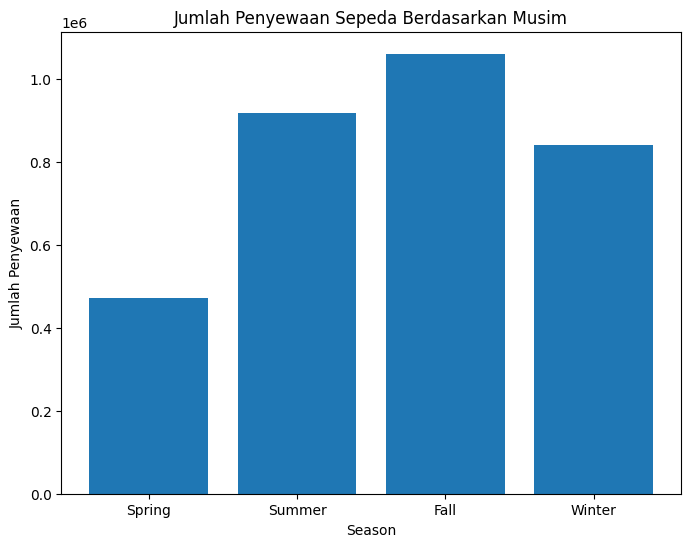

In [17]:
# Mengagregasi data untuk mendapatkan total 'cnt' per 'season' dan menyimpan hasilnya
season_totals = day_df.groupby('season')['cnt'].sum().reset_index()

# Membuat bar chart menggunakan hasil agregasi
plt.figure(figsize=(8, 6)) # Menyesuaikan ukuran figure
plt.bar(x=season_totals['season'], height=season_totals['cnt'])

# Menambahkan label untuk sumbu x dan y, serta judul
plt.xlabel('Season')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')

# Menampilkan plot
plt.show()


### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?

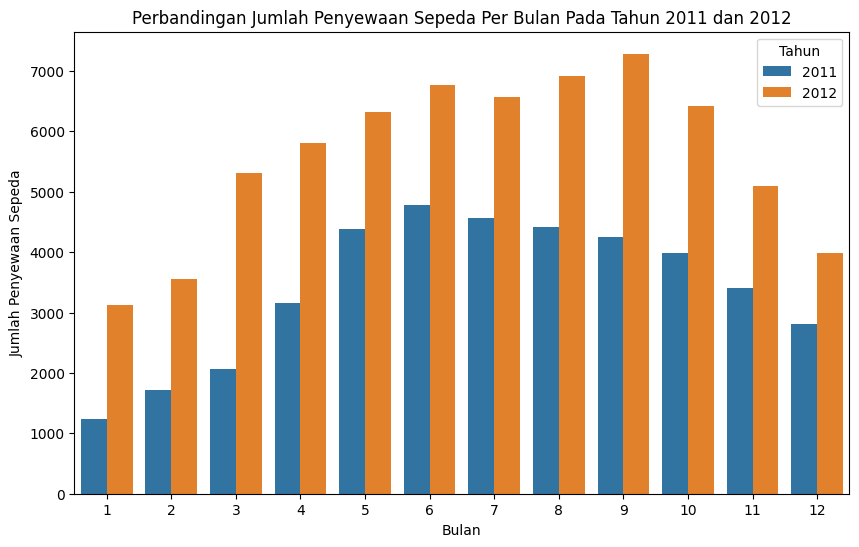

In [14]:
plt.figure(figsize=(10, 6))

# Membuat clustered bar chart
sns.barplot(data=day_df, x='mnth', y='cnt', hue='yr', errorbar=None)

# Menambahkan label untuk sumbu x dan y
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")

# Menambahkan judul
plt.title("Perbandingan Jumlah Penyewaan Sepeda Per Bulan Pada Tahun 2011 dan 2012")

# Mengganti label legenda
plt.legend(title='Tahun', labels=['2011', '2012'])

# Menampilkan plot
plt.show()


## Conclusion

# **Pertanyaan 1: Pada musim apa yang memiliki jumlah penyewaan terbanyak?**

Berdasarkan hasil analisis data untuk menjawab pertanyaan nomor 1, dapat diberikan kesimpulan sebagai berikut:

Pada tahap exploratory data analysis, dilakukan agregrasi menggunakan fungsi groupby yang mengelompokkan data berdasarkan nilai unik dalam kolom season, yang kemudian juga menggunakan .cnt.sum() untuk menghitung jumlah total (sum) dari jumlah penyewaan sepeda pada kolom cnt untuk setiap kelompok musim.

Berdasarkan hasil yang ditampilkan menghasilkan:

*   Musim Spring (1) memiliki total jumlah penyewaan sepeda sebesar 471,348.
*   Musim Summer (2) memiliki total jumlah penyewaan sepeda sebesar 918,589.
*   Musim Fall (3) memiliki total jumlah penyewaan sepeda sebesar 1,061,129.
*   Musim Winter (4) memiliki total jumlah penyewaan sepeda sebesar 841,613.

Pada tahap visualisasi data, dapat disimpulkan bahwa musim dengan jumlah penyewaan sepeda tertinggi adalah musim Fall, yang menunjukkan bahwa pada musim tersebut merupakan waktu paling populer untuk penyewaan sepeda.

# **Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?**

Berdasarkan hasil analisis data untuk menjawab pertanyaan nomor 2, dapat diberikan kesimpulan sebagai berikut:

Pada tahap exploratory data analysis, dilakukan agregrasi menggunakan fungsi groupby yang mengelompokkan data berdasarkan bulan dalam kolom mnth, yang kemudian juga menggunakan .cnt.sum() untuk menghitung jumlah total (sum) dari jumlah penyewaan sepeda pada kolom cnt dalam setiap bulan, yang hasilnya dipisah berdasarkan tahun, yaitu tahun 2011 dan 2012.

Berdasarkan hasil yang ditampilkan, dapat dilihat bahwa pada tahun 2011 terjadi kenaikan jumlah dengan puncak tertinggi pada bulan ke-6 yaitu sebanyak 143512, sedangkan pada tahun 2012 puncak tertingginya pada bulan ke-9 yaitu sebanyak 218573.

Pada tahap visualisasi data, dapat dilihat bahwa perbandingan jumlah penyewaan sepeda tiap bulannya pada tahun 2011 dan 2012 terlihat berbeda. Pada tahun 2012 terjadi kenaikan jumlah penyewa pada setiap bulannya, jika dibandingkan dengan tahun 2011. Namun, distribusi data nya dalam rentang satu tahun masih relatif sama, yaitu terjadi kenaikan pada pertengahan tahun. Apabila diperhatikan dengan seksama, data pada tahun 2011 cenderung hampir membentuk normal distribution.


In [15]:
day_df.to_csv("all_data.csv", index=False)